# Real Estate Price Prediction

User want to know the price of the house of unit area depends on 6 parameter as mentioned below.
Transaction date, house age, distance to the nearest MRT station, number of convenience stores in the living circle, geographic coordinate latitude, geographic coordinate longitude.

- Attribute Information:

- The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

# Importing required libraries for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading real estate dataset from git hub account

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Realdf = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/Real_Estate_Price_Prediction/RealEstatCleanUp.csv')
Realdf = pd.read_csv('/content/drive/MyDrive/RealEstatCleanUp.csv')

In [5]:
Realdf.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,734808,32.0,84.87882,10,24.98298,121.54024,37.9
1,734808,19.5,306.59470,9,24.98034,121.53951,42.2
2,735050,13.3,561.98450,5,24.98746,121.54391,47.3
3,735020,13.3,561.98450,5,24.98746,121.54391,54.8
4,734777,5.0,390.56840,5,24.97937,121.54245,43.1


- Number of rows and columns in the dataset

In [6]:
Realdf.shape

(414, 7)

- There are 414 rows and 8 columns in the above dataset

- Information about dataset like datatype,count etc

In [7]:
Realdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


# Summary of above output
- Above dataset contains 8 columns.
- Two columns are integer datatype and Six columns are float datatype.
- Above dataset doesnot have any null values or empty values.
- Above dataset have 414 etries total

- Extract Train Test Dataset

- -1 = except last column( house price of unit area) loading all rows and columns to X variable

In [8]:
X = Realdf.iloc[:,:-1]
y = Realdf['Y house price of unit area'].values.reshape(-1,1)

- Converting y values to 2 dimensional array

In [9]:
X.shape,y.shape

((414, 6), (414, 1))

In [12]:
414-138

276

In [10]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,32.0,84.87882,10,24.98298,121.54024
1,734808,19.5,306.59470,9,24.98034,121.53951
2,735050,13.3,561.98450,5,24.98746,121.54391
3,735020,13.3,561.98450,5,24.98746,121.54391
4,734777,5.0,390.56840,5,24.97937,121.54245


# Spliting data to train and test lists

- test size =0.25 : Assigning 25% of dataset to test and 75% of dataset to train.
- random state : it will assign same set of rows to every batch to test the module.

In [15]:
X_train = X[:276]
y_train = y[:276]

X_test = X[276:]
y_test = y[276:]

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((276, 6), (138, 6), (276, 1), (138, 1))

# Lets Change Distance from meter to Kilometers

In [17]:
X_train1 = X_train.copy()

In [18]:
X_train1[X_train1.columns[2]] = X_train1[X_train1.columns[2]]/1000
X_train1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,32.0,0.084879,10,24.98298,121.54024
1,734808,19.5,0.306595,9,24.98034,121.53951
2,735050,13.3,0.561984,5,24.98746,121.54391
3,735020,13.3,0.561984,5,24.98746,121.54391
4,734777,5.0,0.390568,5,24.97937,121.54245


In [19]:
X_test1 = X_test.copy()
X_test1[X_test1.columns[2]] = X_test1[X_test1.columns[2]]/1000
X_test1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
276,735203,19.1,0.461102,5,24.95425,121.53990
277,734989,21.2,2.185128,3,24.96322,121.51237
278,734747,0.0,0.208391,6,24.95618,121.53844
279,734989,2.6,1.554250,3,24.97026,121.51642
280,734928,2.3,0.184330,6,24.96581,121.54086


# KNN Algorithm

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
model = KNeighborsRegressor()

In [23]:
model.fit(X_train1,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
print('\nThe number of neighbors used to predict the target : ',model.n_neighbors)


The number of neighbors used to predict the target :  5


- default n_neighbors selected as 5 by model

In [25]:
predict_train = model.predict(X_train1)
predict_train[:5] 

array([[38.94],
       [34.24],
       [40.72],
       [44.92],
       [45.44]])

- Predicting for training dataset. X_train1 is scacle down value

In [26]:
accuracy_train = mean_squared_error(y_train,predict_train)
accuracy_train

101.57674347826087

In [27]:
predict_test = model.predict(X_test1)
predict_test[:5] 

array([[27.  ],
       [38.02],
       [47.74],
       [48.68],
       [47.78]])

In [28]:
accuracy_test = mean_squared_error(y_test,predict_test)
accuracy_test

133.9224260869565

In [32]:
model.score(X_test1,y_test)

0.14067339276415192

In [33]:
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

- checking for different K value what is the error

In [34]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train1, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 24.424629705112913
RMSE value for k=  2 is: 23.651448847981715
RMSE value for k=  3 is: 23.241765636183466
RMSE value for k=  4 is: 22.135107103547234
RMSE value for k=  5 is: 21.00004113177476
RMSE value for k=  6 is: 20.14917839755801
RMSE value for k=  7 is: 19.41622122232526
RMSE value for k=  8 is: 18.733279440745882
RMSE value for k=  9 is: 18.226139066883636
RMSE value for k=  10 is: 17.62903198818868
RMSE value for k=  11 is: 17.006534768063226
RMSE value for k=  12 is: 16.47081044206257
RMSE value for k=  13 is: 16.04209518281158
RMSE value for k=  14 is: 15.723002570106638
RMSE value for k=  15 is: 15.606380626656849
RMSE value for k=  16 is: 15.387178902246713
RMSE value for k=  17 is: 15.2493384233853
RMSE value for k=  18 is: 15.03701554231268
RMSE value for k=  19 is: 14.82767785295662
RMSE value for k=  20 is: 14.537468238653354
RMSE value for k=  21 is: 14.235165664760327
RMSE value for k=  22 is: 13.912400044026485
RMSE value for k=  23 is: 13.

In [35]:
r2_val = [] #to store rmse values for different k
k_val=[]
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train1, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = model.score(X_test1,y_test)
    r2_val.append(error) #store rmse values
    k_val.append(K) #store rmse values
    print('R2 value for k= ' , K , 'is:', error)

R2 value for k=  1 is: -0.04537801897792604
R2 value for k=  2 is: 0.09449815991939581
R2 value for k=  3 is: 0.09736213586067333
R2 value for k=  4 is: 0.15315869749898348
R2 value for k=  5 is: 0.14067339276415192
R2 value for k=  6 is: 0.14757745365293495
R2 value for k=  7 is: 0.11323517447874565
R2 value for k=  8 is: 0.11000245798662744
R2 value for k=  9 is: 0.1062762383572039
R2 value for k=  10 is: 0.08163877788033913
R2 value for k=  11 is: 0.05603429975374318
R2 value for k=  12 is: 0.013670462632608626
R2 value for k=  13 is: -0.0048322123641759696
R2 value for k=  14 is: 0.008138123969491318
R2 value for k=  15 is: 0.01858197168289566
R2 value for k=  16 is: 0.016984383379428092
R2 value for k=  17 is: 0.021463606773942878
R2 value for k=  18 is: 0.0442795614984316
R2 value for k=  19 is: 0.06495150223301904
R2 value for k=  20 is: 0.07546304123276881
R2 value for k=  21 is: 0.0966609058247676
R2 value for k=  22 is: 0.10813629340696085
R2 value for k=  23 is: 0.1077885905

- as we see in above k values output its decreasing simultaneously while increasing k value

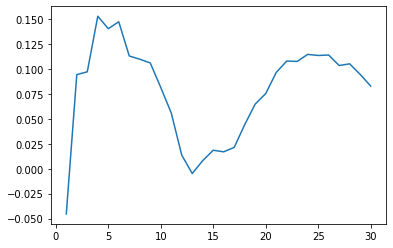

In [36]:
plt.plot(k_val,r2_val)

In [37]:
max(zip(r2_val, k_val))

(0.15315869749898348, 4)

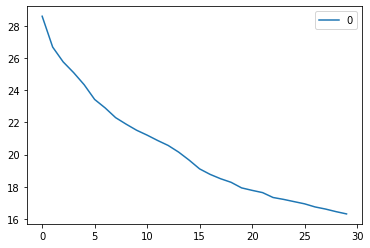

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

- getting best k value by GridsearchCV technique

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train1,y_train)
model.best_params_
model.scorer_
model.

<function sklearn.metrics._scorer._passthrough_scorer>

In [ ]:
X_train1.index[:10]

Int64Index([268, 337, 36, 351, 278, 200, 118, 203, 218, 245], dtype='int64')

In [ ]:
X_test1.index[:10]

Int64Index([101, 181, 64, 149, 270, 92, 44, 404, 287, 74], dtype='int64')

# Linear Regression Model

- Due to predict price of house which is continuous variable we are using Linear Regression model to predict the house price.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(X_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Checking intercept and slope for the dataset

In [ ]:
np.get_printoptions()

{'edgeitems': 3,
 'floatmode': 'maxprec',
 'formatter': None,
 'infstr': 'inf',
 'legacy': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'precision': 8,
 'sign': '-',
 'suppress': False,
 'threshold': 1000}

- Checking co_efficient and intercept values from linear regression model.

In [ ]:
c = lrmodel.intercept_
m = lrmodel.coef_
c,m

(array([-12636.5783771]),
 array([[ 8.10139337e-03, -2.26771910e-01, -4.44209435e+00,
          1.12984878e+00,  2.30297847e+02,  8.01805979e+00]]))

- Above output giving in exponensial values: to convert into normal values we using below with statement

In [ ]:
with np.printoptions(precision=3, suppress=True):
  print(m,c)

[[  0.008  -0.227  -4.442   1.13  230.298   8.018]] [-12636.578]


In [ ]:
Realdf.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
coeffdf =  pd.DataFrame({'col':X.columns,'coeff':m[0]})
coeffdf

,col,coeff
0,X1 transaction date,0.008101
1,X2 house age,-0.226772
2,X3 distance to the nearest MRT station,-4.442094
3,X4 number of convenience stores,1.129849
4,X5 latitude,230.297847
5,X6 longitude,8.018060


- Inference from above output

- X5 latitude column have high impact on price of house.
- if X3 distance increases than house of price reduces due to negative slop
- X1 transaction date is very low impact on price of house

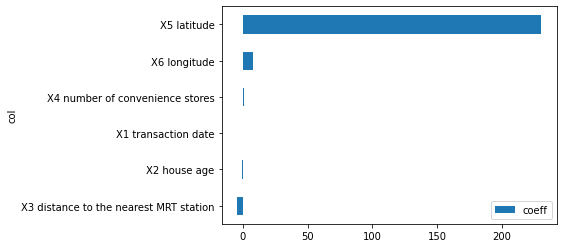

In [ ]:
coeffdf.sort_values('coeff').set_index('col').plot.barh()

- Prdecting for X_train to check how model learnt from given data

In [ ]:
y_learntdf = lrmodel.predict(X_train1)
y_learntdf[:5]

array([[45.10021581],
       [36.82867785],
       [30.15531324],
       [32.21093297],
       [43.60649619]])

In [ ]:
learndf = pd.DataFrame({'Actual':y_train[:,0],'Learnt':y_learntdf[:,0]})
learndf.head()

,Actual,Learnt
0,40.1,45.100216
1,30.9,36.828678
2,22.9,30.155313
3,28.6,32.210933
4,44.0,43.606496


- ploting bar graph to visuialaize actual and learnt values

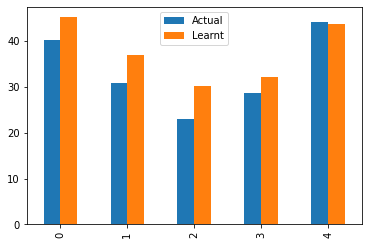

In [ ]:
learndf.head().plot(kind='bar')

# Inference from above Graph
- As we including all the columns and converted distance to MRT station column from meter to Kilometer : Error has been increased.

# importing metrics from sklearn to check mean square error

- We are using metrics to check accuracy of our model.
- Using mean square error we can check how difference between actual and predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
train_mse = mse(y_train,y_learntdf)
train_mse

67.21018854523585

In [ ]:
rmse_train = np.sqrt(train_mse)
rmse_train

8.198182026842039

- As per above result we have 67.24 training mean square error.
- rmse is root mean square

- predicting for test data set

In [ ]:
testdf = lrmodel.predict(X_test1)
testdf[:5]

array([[39.45841839],
       [51.1380725 ],
       [32.7468609 ],
       [41.8478586 ],
       [41.20740955]])

In [ ]:
test = pd.DataFrame({'Actual':y_test[:,0],'Pred':testdf[:,0]})
test.head()

,Actual,Pred
0,32.9,39.458418
1,55.9,51.138073
2,25.3,32.746861
3,39.7,41.847859
4,117.5,41.207410


In [ ]:
test_mse = mse(y_test,testdf)
test_mse

112.2537237942389

In [ ]:
rmse_test = np.sqrt(test_mse)
rmse_test

10.59498578546658

- Above values shows that total difference between actual and predicted values for test dataset is 112 - erorr

# R2 score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_real = r2_score(y_test,testdf)
r2_real

0.47164135409645147

- R2 score will tell how much accurate and effecient your model is.
- From above values we can see that our model is 47% accurate results.

In [ ]:
y_mean = Realdf['Y house price of unit area'].mean()**2
y_mean

1442.4950782982105

In [ ]:
n= X.shape[0]
k= X.shape[1]
n,k

(414, 6)

In [ ]:
Adj_R2 = 1-(((1-r2_real)*(n-1))/(n-k-1))
Adj_R2

0.46385228314947036

- As we included 6 columns in the dataset and r2 score is 47% 
- our Adjusted R2 score is 46%